## Library

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import tempfile  # 추가
from scipy.stats import shapiro, spearmanr, kruskal
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
warnings.filterwarnings('ignore')

In [36]:
data_path = "../data/weather_preprocess_v1.csv"
df = pd.read_csv(data_path)
df

,ObservationTime,StationID,WindDirection,WindSpeed,GustDirection,GustSpeed,GustTime,LocalPressure,SeaLevelPressure,PressureTrend,...,SoilTemperature30cm,SeaCondition,WaveHeight,MaxWindForce,PrecipitationData,ObservationType,year,month,day,hour
0,2022-09-03 00:00:00,108,5,3.1,-9,-9.0,-9,1006.4,1016.3,0,...,25.0,-9,-9.0,-9,3,2,2022,9,3,0
1,2022-09-03 01:00:00,108,7,2.9,-9,-9.0,-9,1005.9,1015.8,-9,...,25.0,-9,-9.0,-9,3,-9,2022,9,3,1
2,2022-09-03 02:00:00,108,5,3.3,-9,-9.0,-9,1005.2,1015.1,-9,...,24.9,-9,-9.0,-9,3,-9,2022,9,3,2
3,2022-09-03 03:00:00,108,5,3.0,-9,-9.0,-9,1005.2,1015.1,6,...,24.9,-9,-9.0,-9,3,2,2022,9,3,3
4,2022-09-03 04:00:00,108,5,3.4,-9,-9.0,-9,1004.7,1014.6,-9,...,24.8,-9,-9.0,-9,3,2,2022,9,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,2025-05-29 14:00:00,108,27,3.7,-9,-9.0,-9,1003.4,1013.1,-9,...,16.9,-9,-9.0,-9,3,2,2025,5,29,14
23943,2025-05-29 15:00:00,108,27,2.9,-9,-9.0,-9,1002.7,1012.5,7,...,17.0,-9,-9.0,-9,3,2,2025,5,29,15
23944,2025-05-29 16:00:00,108,27,3.3,-9,-9.0,-9,1002.0,1011.7,-9,...,17.1,-9,-9.0,-9,3,2,2025,5,29,16
23945,2025-05-29 17:00:00,108,25,3.1,-9,-9.0,-9,1001.7,1011.4,-9,...,17.3,-9,-9.0,-9,3,2,2025,5,29,17


In [37]:
df.columns

Index(['ObservationTime', 'StationID', 'WindDirection', 'WindSpeed',
       'GustDirection', 'GustSpeed', 'GustTime', 'LocalPressure',
       'SeaLevelPressure', 'PressureTrend', 'PressureChange', 'Temperature',
       'DewPointTemperature', 'RelativeHumidity', 'VaporPressure',
       'HourlyRainfall', 'DailyRainfall', 'CumulativeRainfall',
       'RainfallIntensity', 'SnowDepth3Hr', 'DailySnowDepth', 'TotalSnowDepth',
       'CurrentWeatherCode', 'PastWeatherCode', 'WeatherCode',
       'TotalCloudCover', 'MidLowCloudCover', 'LowestCloudHeight', 'CloudType',
       'UpperCloudType', 'MidCloudType', 'LowCloudType', 'Visibility',
       'SunshineDuration', 'SolarRadiation', 'GroundCondition',
       'GroundTemperature', 'SoilTemperature5cm', 'SoilTemperature10cm',
       'SoilTemperature20cm', 'SoilTemperature30cm', 'SeaCondition',
       'WaveHeight', 'MaxWindForce', 'PrecipitationData', 'ObservationType',
       'year', 'month', 'day', 'hour'],
      dtype='object')

## Data Preprocessing

- Data Type Check
- Missing Value Check

In [38]:
df.describe()

,StationID,WindDirection,WindSpeed,GustDirection,GustSpeed,GustTime,LocalPressure,SeaLevelPressure,PressureTrend,PressureChange,...,SoilTemperature30cm,SeaCondition,WaveHeight,MaxWindForce,PrecipitationData,ObservationType,year,month,day,hour
count,23947.0,23947.000000,23947.000000,23947.000000,23947.000000,23947.000000,23947.000000,23947.000000,23947.000000,23947.000000,...,23947.000000,23947.0,23947.0,23947.0,23947.000000,23947.00000,23947.000000,23947.000000,23947.000000,23947.000000
mean,108.0,18.199733,2.306055,-7.339207,-7.868961,64.214474,1006.173867,1016.442724,-4.616152,-5.999587,...,13.404593,-9.0,-9.0,-9.0,3.103520,-0.15718,2023.542949,6.474799,15.719004,11.504823
std,0.0,10.825325,1.210895,7.183436,4.682560,329.840824,7.953830,8.357432,6.379948,4.300358,...,9.347820,0.0,0.0,0.0,0.402447,4.07707,0.886496,3.596131,8.766494,6.920007
min,108.0,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,981.400000,990.900000,-9.000000,-9.000000,...,-0.700000,-9.0,-9.0,-9.0,1.000000,-9.00000,2022.000000,1.000000,1.000000,0.000000
25%,108.0,5.000000,1.500000,-9.000000,-9.000000,-9.000000,1000.000000,1009.900000,-9.000000,-9.000000,...,4.200000,-9.0,-9.0,-9.0,3.000000,1.00000,2023.000000,3.000000,8.000000,6.000000
50%,108.0,23.000000,2.200000,-9.000000,-9.000000,-9.000000,1006.500000,1016.700000,-9.000000,-9.000000,...,14.100000,-9.0,-9.0,-9.0,3.000000,2.00000,2024.000000,6.000000,16.000000,12.000000
75%,108.0,27.000000,3.000000,-9.000000,-9.000000,-9.000000,1012.400000,1023.000000,2.000000,-0.800000,...,22.100000,-9.0,-9.0,-9.0,3.000000,2.00000,2024.000000,10.000000,23.000000,17.000000
max,108.0,36.000000,8.400000,36.000000,21.000000,2354.000000,1027.400000,1038.900000,8.000000,5.400000,...,29.700000,-9.0,-9.0,-9.0,4.000000,2.00000,2025.000000,12.000000,31.000000,23.000000


### Data Type Check

In [39]:
# Data type check
def check_dtype(df, return_data=False):
    object_df = df.select_dtypes(include=['object'])
    num_df = df.select_dtypes(include=['number'])

    print(f"Object Data Type: {object_df.shape[1]}")
    print(f"Number Data Type: {num_df.shape[1]}")

    if return_data: # 데이터 프레임 할당
        return object_df, num_df

In [40]:
str_df, num_df = check_dtype(df, return_data=True)

Object Data Type: 3
Number Data Type: 47


In [41]:
num_df.columns

Index(['StationID', 'WindDirection', 'WindSpeed', 'GustDirection', 'GustSpeed',
       'GustTime', 'LocalPressure', 'SeaLevelPressure', 'PressureTrend',
       'PressureChange', 'Temperature', 'DewPointTemperature',
       'RelativeHumidity', 'VaporPressure', 'HourlyRainfall', 'DailyRainfall',
       'CumulativeRainfall', 'RainfallIntensity', 'SnowDepth3Hr',
       'DailySnowDepth', 'TotalSnowDepth', 'CurrentWeatherCode',
       'PastWeatherCode', 'TotalCloudCover', 'MidLowCloudCover',
       'LowestCloudHeight', 'UpperCloudType', 'MidCloudType', 'LowCloudType',
       'Visibility', 'SunshineDuration', 'SolarRadiation', 'GroundCondition',
       'GroundTemperature', 'SoilTemperature5cm', 'SoilTemperature10cm',
       'SoilTemperature20cm', 'SoilTemperature30cm', 'SeaCondition',
       'WaveHeight', 'MaxWindForce', 'PrecipitationData', 'ObservationType',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [42]:
# StationID 는 지점번호 를 의미 그래서 문자열로 변경
df['StationID'] = df['StationID'].astype(str)
str_df, num_df = check_dtype(df, return_data=True) # 재할당

Object Data Type: 4
Number Data Type: 46


In [43]:
str_df.head()

,ObservationTime,StationID,WeatherCode,CloudType
0,2022-09-03 00:00:00,108,-,-
1,2022-09-03 01:00:00,108,-,-
2,2022-09-03 02:00:00,108,-,-
3,2022-09-03 03:00:00,108,-,Ac
4,2022-09-03 04:00:00,108,-,Ac


### Missing Value Check

In [44]:
df.isnull().sum().sum()

0

In [45]:
# -표시 확인
str_df.isin(['-']).sum()

ObservationTime        0
StationID              0
WeatherCode        17556
CloudType          10945
dtype: int64

In [46]:
cols_to_replace = ['CloudType', 'WeatherCode']
df[cols_to_replace] = df[cols_to_replace].replace('-', 'Other')
df.isin(['-']).sum().sum()

0

## EDA

- Normality Test

In [47]:
# 정규성 검토
def normality_test(df):
    df = df.select_dtypes(include=['number'])
    test_col = df.columns

    satisfied_cols = [] # 정규성 만족 컬럼
    unsatisfied_cols = [] # 정규성 불만족 컬럼

    for col in test_col:
        data = df[col]
        stat, p = shapiro(data)
        if p > 0.05:
            satisfied_cols.append(col)
        else:
            unsatisfied_cols.append(col)
            
    print(f"정규성 만족 컬럼 수: {len(satisfied_cols)}")
    print(f"정규성 불만족 컬럼 수: {len(unsatisfied_cols)}")
    return satisfied_cols, unsatisfied_cols

In [48]:
yes_norm, no_norm = normality_test(df)

print(f"\n정규성 만족 컬럼: {yes_norm}")

정규성 만족 컬럼 수: 4
정규성 불만족 컬럼 수: 42

정규성 만족 컬럼: ['GroundCondition', 'SeaCondition', 'WaveHeight', 'MaxWindForce']


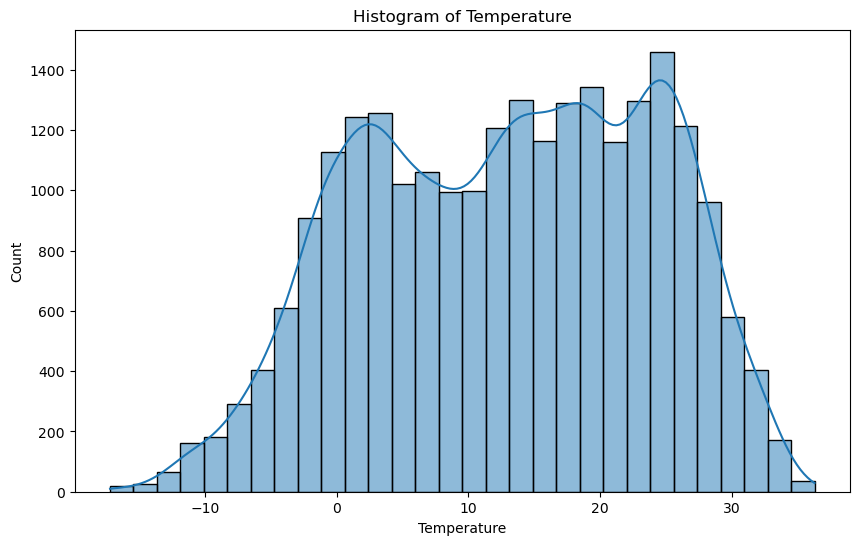

count    23947.000000
mean        12.991531
std         10.892644
min        -17.200000
25%          3.800000
50%         13.700000
75%         22.200000
max         36.300000
Name: Temperature, dtype: float64

In [49]:
# target 변수 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.title('Histogram of Temperature')
plt.show()

df['Temperature'].describe()

## Feature Engineering

- Spearman Test
- Kruskal-Wallis Test
- Encoding

### Spearman Test

In [50]:
def spearman_test(df, target_col):
    df_numeric = df.select_dtypes(include=['number'])
    features = []
    correlations = []
    p_values = []

    for col in df_numeric.columns:
        if col != target_col:
            corr, p = spearmanr(df_numeric[target_col], df_numeric[col])
            features.append(col)
            correlations.append(corr)
            p_values.append(p)

    corr_df = pd.DataFrame({
        'Feature': features,
        'Correlation': correlations,
        'P-value': p_values}).sort_values(by='Correlation', ascending=False).reset_index(drop=True)

    return corr_df

# heat_map
def heat_map(df, target_col=None, figsize=(8, 10), threshold=0, cmap='Reds', method='pearson', annot_kws=None, return_data=False):
        df = df.select_dtypes(include=['number'])
        
        if annot_kws is None:
            annot_kws = {"size": 10}

        if target_col is not None:
            corr_series = df.corr(method=method)[target_col].drop(target_col)
            corr_filtered = corr_series[abs(corr_series) >= threshold].sort_values(ascending=False)

            plt.figure(figsize=figsize)
            sns.heatmap(corr_filtered.to_frame(name='Correlation'), annot=True, fmt='.2f', cmap=cmap, annot_kws=annot_kws, cbar=True)
            plt.title(f'{method.capitalize()} Correlation with {target_col}', fontsize=14)
            plt.show()

            corr_df = corr_filtered.reset_index()
            corr_df.columns = ['Variable', 'Correlation']

            if return_data:
                return corr_df

        else:
            corr_matrix = df.corr(method=method) # 전체 변수 간 상관계수

            plt.figure(figsize=figsize)
            sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=cmap, annot_kws=annot_kws, cbar=True)
            plt.title(f'{method.capitalize()} Correlation Matrix (All Variables)', fontsize=14)
            plt.show()

            if return_data:
                return corr_matrix

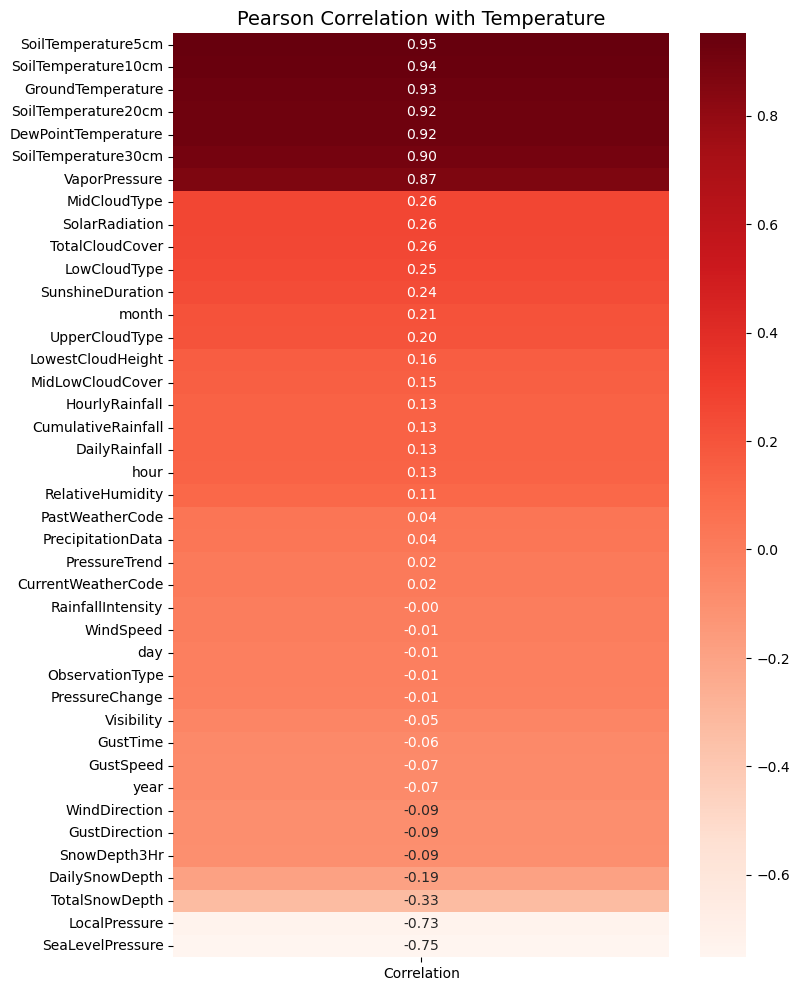

유의미하지 않은 변수의 수: 5
유의미한 변수의 수: 36


,Feature,Correlation,P-value
24,RainfallIntensity,-0.001941,0.763936
25,day,-0.002068,0.749015
26,Visibility,-0.002093,0.746071
27,PastWeatherCode,-0.002596,0.687944
28,ObservationType,-0.003391,0.599782


In [51]:
heat_map(df, target_col='Temperature', figsize=(8, 12))
df_spearman = spearman_test(df, 'Temperature')

p_value_05 = df_spearman[df_spearman['P-value'] >= 0.05]
p_value_over_05 = df_spearman[df_spearman['P-value'] < 0.05]

print(f'유의미하지 않은 변수의 수: {len(p_value_05)}')
print(f'유의미한 변수의 수: {len(p_value_over_05)}')

p_value_05

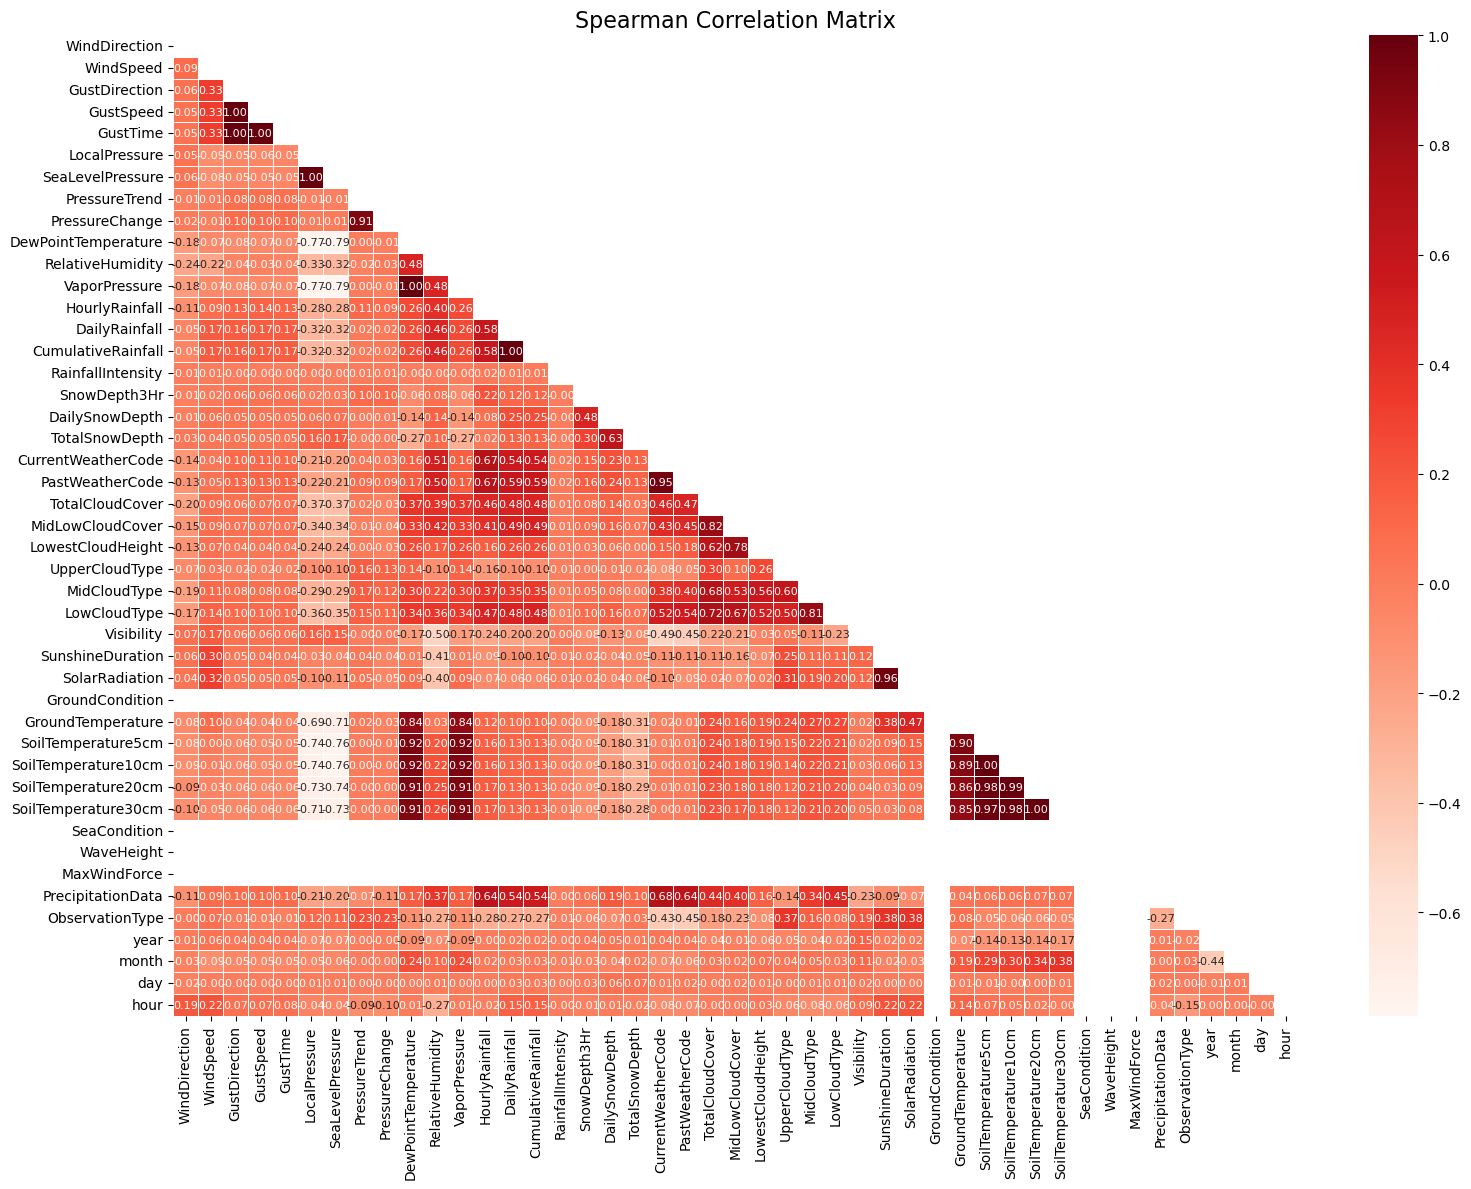

In [52]:
corr = df.select_dtypes(include=['number']).drop(columns=['Temperature']).corr(method='spearman')

plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Reds', linewidths=0.5, mask=np.triu(corr), annot_kws={'size': 8})
plt.title("Spearman Correlation Matrix", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
def remove_high_corr_target(df, target_col, threshold=0.95, method='spearman'):
    feats = df.select_dtypes(include=[np.number]).columns.drop(target_col)
    corr_feats = df[feats].corr(method=method).abs()
    corr_target = df[feats].corrwith(df[target_col], method=method).abs()
    
    to_drop = set()
    for i, f1 in enumerate(feats):
        for f2 in feats[i+1:]:
            # 0.95 초과인 경우
            if corr_feats.loc[f1, f2] > threshold:
                if corr_target[f1] >= corr_target[f2]:
                    to_drop.add(f2)
                else:
                    to_drop.add(f1)
    return list(to_drop)

In [54]:
corr_drop_cols = remove_high_corr_target(df, target_col='Temperature', threshold=0.95, method='spearman')
print("제거할 피처 수:", len(corr_drop_cols))
print("제거할 피처:", corr_drop_cols)

제거할 피처 수: 9
제거할 피처: ['SoilTemperature30cm', 'GustSpeed', 'SunshineDuration', 'GustTime', 'SoilTemperature20cm', 'LocalPressure', 'SoilTemperature10cm', 'CumulativeRainfall', 'DewPointTemperature']


In [55]:
# 유의미하지 않은 변수 제거
p_value_05_cols = p_value_05['Feature'].tolist()
p_value_05_cols.remove('day') # day 는 보존

drop_cols = p_value_05_cols + corr_drop_cols
df = df.drop(columns=drop_cols)
df

,ObservationTime,StationID,WindDirection,WindSpeed,GustDirection,SeaLevelPressure,PressureTrend,PressureChange,Temperature,RelativeHumidity,...,GroundTemperature,SoilTemperature5cm,SeaCondition,WaveHeight,MaxWindForce,PrecipitationData,year,month,day,hour
0,2022-09-03 00:00:00,108,5,3.1,-9,1016.3,0,0.3,22.3,62.0,...,19.8,25.0,-9,-9.0,-9,3,2022,9,3,0
1,2022-09-03 01:00:00,108,7,2.9,-9,1015.8,-9,-9.0,21.7,65.0,...,19.2,24.6,-9,-9.0,-9,3,2022,9,3,1
2,2022-09-03 02:00:00,108,5,3.3,-9,1015.1,-9,-9.0,21.3,67.0,...,18.9,24.3,-9,-9.0,-9,3,2022,9,3,2
3,2022-09-03 03:00:00,108,5,3.0,-9,1015.1,6,-1.2,21.3,67.0,...,19.7,24.0,-9,-9.0,-9,3,2022,9,3,3
4,2022-09-03 04:00:00,108,5,3.4,-9,1014.6,-9,-9.0,21.1,67.0,...,19.2,23.8,-9,-9.0,-9,3,2022,9,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,2025-05-29 14:00:00,108,27,3.7,-9,1013.1,-9,-9.0,26.3,42.0,...,45.3,24.8,-9,-9.0,-9,3,2025,5,29,14
23943,2025-05-29 15:00:00,108,27,2.9,-9,1012.5,7,-2.2,25.8,39.0,...,35.2,25.4,-9,-9.0,-9,3,2025,5,29,15
23944,2025-05-29 16:00:00,108,27,3.3,-9,1011.7,-9,-9.0,27.2,34.0,...,41.1,25.3,-9,-9.0,-9,3,2025,5,29,16
23945,2025-05-29 17:00:00,108,25,3.1,-9,1011.4,-9,-9.0,26.2,47.0,...,33.2,25.3,-9,-9.0,-9,3,2025,5,29,17


### Kruskal-Wallis Test

In [56]:
def kruskal_test(df, target_col, min_group_size=5):
    cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
    results = []

    for col in cat_cols:
        grouped = df.groupby(col)[target_col]
        valid_groups = [grp.values for _, grp in grouped if grp.size >= min_group_size]
        if len(valid_groups) >= 2:
            stat, p = kruskal(*valid_groups)
            results.append({'feature': col, 'H-statistic': stat, 'p-value': p})

    return pd.DataFrame(results).sort_values('p-value').reset_index(drop=True)

In [57]:
kruskal_df = kruskal_test(df, 'Temperature')
kruskal_df

,feature,H-statistic,p-value
0,WeatherCode,1926.80888,0.0
1,CloudType,2838.30545,0.0


In [58]:
# 날씨 코드 'WeatherCode', 지점번호 'StationID', 관측시간 'ObservationTime' 제거
df = df.drop(columns=['WeatherCode', 'StationID', 'ObservationTime'])

# 컬럼 순서 변경
df = df[['year', 'month', 'day', 'hour', 'Temperature'] + [c for c in df if c not in ['year', 'month', 'day', 'hour', 'Temperature']]]
df

,year,month,day,hour,Temperature,WindDirection,WindSpeed,GustDirection,SeaLevelPressure,PressureTrend,...,MidCloudType,LowCloudType,SolarRadiation,GroundCondition,GroundTemperature,SoilTemperature5cm,SeaCondition,WaveHeight,MaxWindForce,PrecipitationData
0,2022,9,3,0,22.3,5,3.1,-9,1016.3,0,...,-9,-9,-9.00,-9,19.8,25.0,-9,-9.0,-9,3
1,2022,9,3,1,21.7,7,2.9,-9,1015.8,-9,...,-9,-9,-9.00,-9,19.2,24.6,-9,-9.0,-9,3
2,2022,9,3,2,21.3,5,3.3,-9,1015.1,-9,...,-9,-9,-9.00,-9,18.9,24.3,-9,-9.0,-9,3
3,2022,9,3,3,21.3,5,3.0,-9,1015.1,6,...,3,0,-9.00,-9,19.7,24.0,-9,-9.0,-9,3
4,2022,9,3,4,21.1,5,3.4,-9,1014.6,-9,...,3,0,-9.00,-9,19.2,23.8,-9,-9.0,-9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,2025,5,29,14,26.3,27,3.7,-9,1013.1,-9,...,0,2,3.19,-9,45.3,24.8,-9,-9.0,-9,3
23943,2025,5,29,15,25.8,27,2.9,-9,1012.5,7,...,0,2,2.30,-9,35.2,25.4,-9,-9.0,-9,3
23944,2025,5,29,16,27.2,27,3.3,-9,1011.7,-9,...,0,2,2.76,-9,41.1,25.3,-9,-9.0,-9,3
23945,2025,5,29,17,26.2,25,3.1,-9,1011.4,-9,...,0,8,1.15,-9,33.2,25.3,-9,-9.0,-9,3


In [59]:
# 계절변수 생성
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

df['season'] = df['month'].apply(get_season)
df.head()

,year,month,day,hour,Temperature,WindDirection,WindSpeed,GustDirection,SeaLevelPressure,PressureTrend,...,LowCloudType,SolarRadiation,GroundCondition,GroundTemperature,SoilTemperature5cm,SeaCondition,WaveHeight,MaxWindForce,PrecipitationData,season
0,2022,9,3,0,22.3,5,3.1,-9,1016.3,0,...,-9,-9.0,-9,19.8,25.0,-9,-9.0,-9,3,Fall
1,2022,9,3,1,21.7,7,2.9,-9,1015.8,-9,...,-9,-9.0,-9,19.2,24.6,-9,-9.0,-9,3,Fall
2,2022,9,3,2,21.3,5,3.3,-9,1015.1,-9,...,-9,-9.0,-9,18.9,24.3,-9,-9.0,-9,3,Fall
3,2022,9,3,3,21.3,5,3.0,-9,1015.1,6,...,0,-9.0,-9,19.7,24.0,-9,-9.0,-9,3,Fall
4,2022,9,3,4,21.1,5,3.4,-9,1014.6,-9,...,0,-9.0,-9,19.2,23.8,-9,-9.0,-9,3,Fall


In [60]:
str_df, num_df = check_dtype(df ,return_data=True)

for col in str_df.columns:
    print(f"{col}의 유니크 수: {str_df[col].nunique()}")

Object Data Type: 2
Number Data Type: 33
CloudType의 유니크 수: 47
season의 유니크 수: 4


### Encoding

In [61]:
features = df.copy()

le = LabelEncoder()
features['CloudType_encoded'] = le.fit_transform(features['CloudType'])
features = features.drop(columns=['CloudType'])  # 원본 컬럼 삭제

features = pd.get_dummies(features, columns=['season'], drop_first=False).astype(int)
features

,year,month,day,hour,Temperature,WindDirection,WindSpeed,GustDirection,SeaLevelPressure,PressureTrend,...,SoilTemperature5cm,SeaCondition,WaveHeight,MaxWindForce,PrecipitationData,CloudType_encoded,season_Fall,season_Spring,season_Summer,season_Winter
0,2022,9,3,0,22,5,3,-9,1016,0,...,25,-9,-9,-9,3,30,1,0,0,0
1,2022,9,3,1,21,7,2,-9,1015,-9,...,24,-9,-9,-9,3,30,1,0,0,0
2,2022,9,3,2,21,5,3,-9,1015,-9,...,24,-9,-9,-9,3,30,1,0,0,0
3,2022,9,3,3,21,5,3,-9,1015,6,...,24,-9,-9,-9,3,0,1,0,0,0
4,2022,9,3,4,21,5,3,-9,1014,-9,...,23,-9,-9,-9,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,2025,5,29,14,26,27,3,-9,1013,-9,...,24,-9,-9,-9,3,19,0,1,0,0
23943,2025,5,29,15,25,27,2,-9,1012,7,...,25,-9,-9,-9,3,19,0,1,0,0
23944,2025,5,29,16,27,27,3,-9,1011,-9,...,25,-9,-9,-9,3,19,0,1,0,0
23945,2025,5,29,17,26,25,3,-9,1011,-9,...,25,-9,-9,-9,3,28,0,1,0,0


## Models

In [62]:
features = features.sort_values(by=['year', 'month', 'day', 'hour'])  # 시계열 정렬
features['target_temp'] = features['Temperature'].shift(-1)  # 1시간 뒤 온도를 타겟으로
features = features.dropna(subset=['target_temp'])  # 마지막 row는 타겟이 없으니 제거
features

,year,month,day,hour,Temperature,WindDirection,WindSpeed,GustDirection,SeaLevelPressure,PressureTrend,...,SeaCondition,WaveHeight,MaxWindForce,PrecipitationData,CloudType_encoded,season_Fall,season_Spring,season_Summer,season_Winter,target_temp
0,2022,9,3,0,22,5,3,-9,1016,0,...,-9,-9,-9,3,30,1,0,0,0,21.0
1,2022,9,3,1,21,7,2,-9,1015,-9,...,-9,-9,-9,3,30,1,0,0,0,21.0
2,2022,9,3,2,21,5,3,-9,1015,-9,...,-9,-9,-9,3,30,1,0,0,0,21.0
3,2022,9,3,3,21,5,3,-9,1015,6,...,-9,-9,-9,3,0,1,0,0,0,21.0
4,2022,9,3,4,21,5,3,-9,1014,-9,...,-9,-9,-9,3,0,1,0,0,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23941,2025,5,29,13,25,27,3,-9,1014,-9,...,-9,-9,-9,3,31,0,1,0,0,26.0
23942,2025,5,29,14,26,27,3,-9,1013,-9,...,-9,-9,-9,3,19,0,1,0,0,25.0
23943,2025,5,29,15,25,27,2,-9,1012,7,...,-9,-9,-9,3,19,0,1,0,0,27.0
23944,2025,5,29,16,27,27,3,-9,1011,-9,...,-9,-9,-9,3,19,0,1,0,0,26.0


In [63]:
split_idx = int(len(features) * 0.8)
train = features.iloc[:split_idx]
valid = features.iloc[split_idx:]

X_train = train.drop(columns=['Temperature', 'target_temp'])
y_train = train['target_temp']
X_val = valid.drop(columns=['Temperature', 'target_temp'])
y_val = valid['target_temp']

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (19156, 37)
y_train: (19156,)


In [64]:
def select_models(X_train, X_val, y_train, y_val):
    tmp_dir = tempfile.mkdtemp()  # 임시 디렉토리 생성

    models = {
        "LightGBM": LGBMRegressor(
            n_estimators=1000, 
            learning_rate=0.05, 
            max_depth=10, 
            subsample=0.8, 
            colsample_bytree=0.8,
            random_state=42, 
            n_jobs=-1, 
            verbose=-1
        ),
        "RandomForest": RandomForestRegressor(
            n_estimators=300,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            random_state=42,
            n_jobs=-1,
            verbose=0
        ),
        "ExtraTrees": ExtraTreesRegressor(
            n_estimators=300,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            random_state=42,
            n_jobs=-1,
            verbose=0
        ),
        "XGBoost": XGBRegressor(
            n_estimators=1000,
            learning_rate=0.05,
            max_depth=10,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1,
            verbosity=0
        ),
        "CatBoost": CatBoostRegressor(
            iterations=1000,
            learning_rate=0.05,
            depth=10,
            l2_leaf_reg=3,
            bagging_temperature=1,
            random_strength=1,
            thread_count=-1,
            random_state=42,
            verbose=False,
            train_dir=tmp_dir  # catboost_info 폴더 생성 방지
        )
    }

    results = []
    trained_models = {}
    total = len(models)

    for idx, (name, model) in enumerate(models.items(), start=1):
        print(f"[{idx}/{total}] Training model: {name} ...")

        start_time = time.time()  # 학습 시작 시간 기록
        model.fit(X_train, y_train)
        end_time = time.time()  # 학습 종료 시간 기록
        training_time = round(end_time - start_time, 2)  # 학습 시간 계산

        y_pred = model.predict(X_val)

        rmse = mean_squared_error(y_val, y_pred, squared=False)

        results.append({
            "model": name,
            "RMSE": rmse,
            "Training_Time": training_time})  # 학습 시간 추가

        trained_models[name] = model  # 모델 저장

    metrics_df = pd.DataFrame(results)
    metrics_df = metrics_df.sort_values("RMSE", ascending=True).reset_index(drop=True)

    return metrics_df, trained_models

In [65]:
metrics_df, models = select_models(X_train, X_val, y_train, y_val)
metrics_df

[1/5] Training model: LightGBM ...
[2/5] Training model: RandomForest ...
[3/5] Training model: ExtraTrees ...
[4/5] Training model: XGBoost ...
[5/5] Training model: CatBoost ...


,model,RMSE,Training_Time
0,LightGBM,1.193365,2.62
1,CatBoost,1.266457,4.25
2,XGBoost,1.414859,2.82
3,RandomForest,1.714926,0.64
4,ExtraTrees,2.015208,0.38
